Codigo para preparar TEST Dataset . 
El tratamiento incluye:
- Descartar logs que no necesitamos:
  - "WELLNUM" "DEPTH", "DTS", "BS", "CALI", "DENC", "ROP"
- Inspeccional los datos
- Convertir los valores -9999 a NAN
- Interpolar
- Convertir los valores de resistividad (RMED y RDEP) a log10

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import missingno as msno
from scipy import interpolate

In [2]:
#Load dataset file
test_path = "../dataset/test.csv"
test_data = pd.read_csv(test_path)

In [3]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11275 entries, 0 to 11274
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WELLNUM  11275 non-null  int64  
 1   DEPTH    11275 non-null  float64
 2   DTC      11275 non-null  float64
 3   DTS      11275 non-null  float64
 4   BS       11275 non-null  float64
 5   CALI     11275 non-null  float64
 6   DEN      11275 non-null  float64
 7   DENC     11275 non-null  float64
 8   GR       11275 non-null  float64
 9   NEU      11275 non-null  float64
 10  PEF      11275 non-null  float64
 11  RDEP     11275 non-null  float64
 12  RMED     11275 non-null  float64
 13  ROP      11275 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 1.2 MB


In [4]:
test_data = test_data.mask(test_data == -9999.0, np.nan)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11275 entries, 0 to 11274
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WELLNUM  11275 non-null  int64  
 1   DEPTH    11275 non-null  float64
 2   DTC      10614 non-null  float64
 3   DTS      3911 non-null   float64
 4   BS       11275 non-null  float64
 5   CALI     11275 non-null  float64
 6   DEN      11193 non-null  float64
 7   DENC     11193 non-null  float64
 8   GR       11275 non-null  float64
 9   NEU      11271 non-null  float64
 10  PEF      11193 non-null  float64
 11  RDEP     11198 non-null  float64
 12  RMED     11198 non-null  float64
 13  ROP      6394 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 1.2 MB


In [5]:
logs_discarded = ["WELLNUM","DEPTH", "BS", "CALI", "DENC", "DTS", "ROP"]
test_data = test_data.drop(columns=logs_discarded)

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11275 entries, 0 to 11274
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DTC     10614 non-null  float64
 1   DEN     11193 non-null  float64
 2   GR      11275 non-null  float64
 3   NEU     11271 non-null  float64
 4   PEF     11193 non-null  float64
 5   RDEP    11198 non-null  float64
 6   RMED    11198 non-null  float64
dtypes: float64(7)
memory usage: 616.7 KB


<AxesSubplot:>

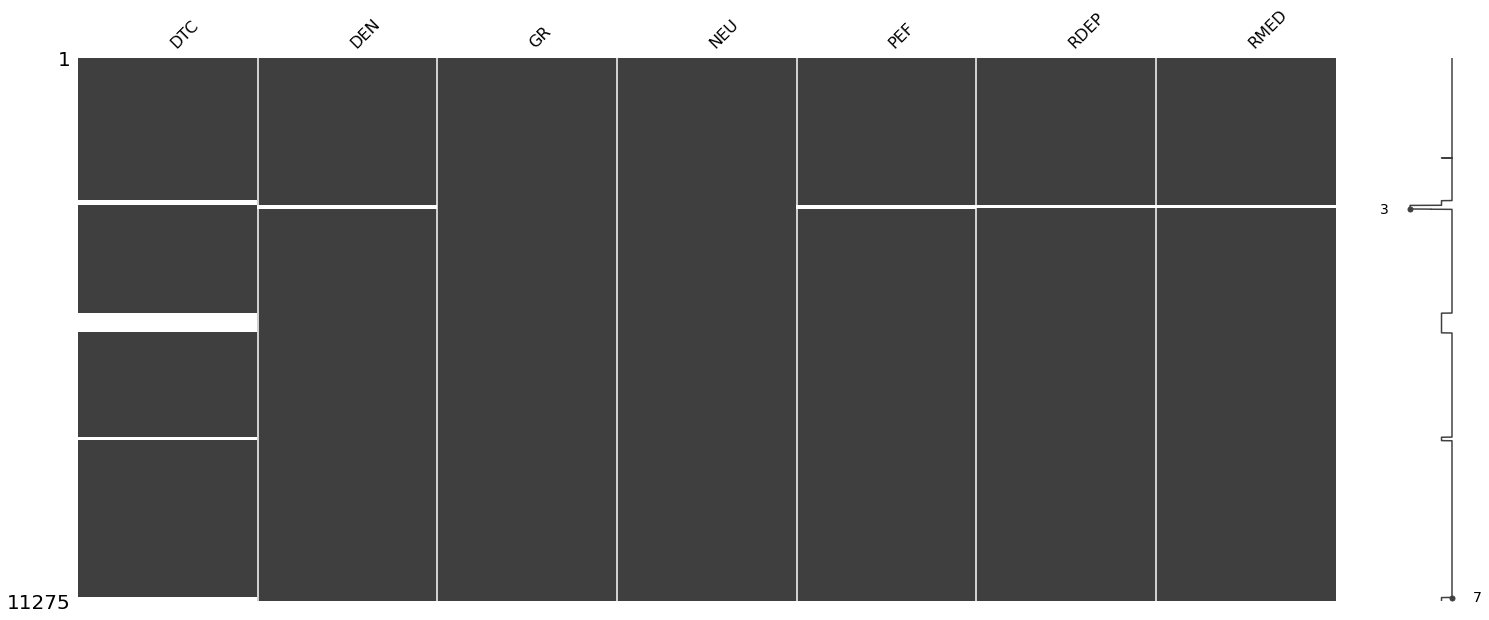

In [7]:
msno.matrix(test_data)

In [8]:
test_data=test_data.interpolate()

<AxesSubplot:>

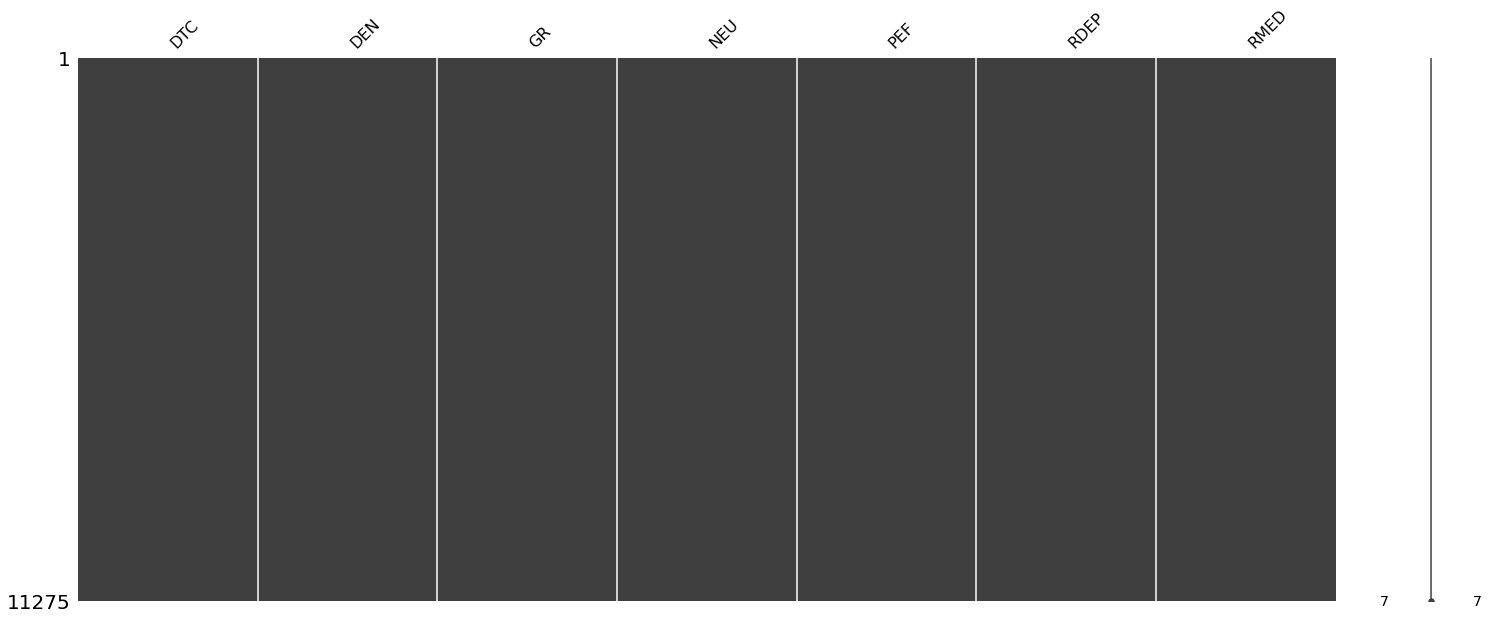

In [9]:
msno.matrix(test_data)

In [10]:
print(np.min(test_data.RDEP))
print(np.min(test_data.RMED))

0.1
0.1


In [11]:
test_data["RDEP"] = np.log10(test_data['RDEP'])
test_data["RMED"] = np.log10(test_data['RMED'])

In [12]:
test_data.sample(10)

,DTC,DEN,GR,NEU,PEF,RDEP,RMED
7506,94.69200,2.102963,107.25400,0.565805,4.428656,0.462611,0.527978
8454,103.82200,2.486980,142.92400,0.297163,5.404089,0.141509,0.135508
6032,84.39130,2.495644,90.63700,0.244410,3.300851,0.259185,0.252389
6281,76.35760,2.490862,38.53690,0.193461,3.655311,0.292103,0.131224
4200,78.56500,2.313734,54.23580,0.211866,2.742256,0.879074,0.857526
274,65.84209,2.569886,19.71565,0.090577,5.128988,0.760458,0.759275
9658,85.89700,2.198852,18.70740,0.183982,2.785187,1.822042,1.832951
7005,84.18520,2.205750,15.58940,0.176433,2.165914,2.131372,2.159865
7284,85.84100,2.199544,16.99610,0.198556,2.067144,1.165701,1.132599
10320,75.17940,2.271115,52.34380,0.237415,3.585114,0.993389,0.844022


In [13]:
test_data.to_csv("../dataset/TEST_dataset_clean.csv", index = False)